PUNTO 1

In [6]:
import pandas as pd
df = pd.read_excel(r"C:\Users\El economista\Documents\GitHub\-BigDataUBA-Grupo-25\TPs\TP 2\df_completo.xlsx")

In [9]:
# Renombrar la columna "edad" a "edad2"
df.rename(columns={"ch06": "edad2"}, inplace=True)

# Crear la nueva columna "edad²" con los valores al cuadrado
df["edad²"] = df["edad2"] ** 2

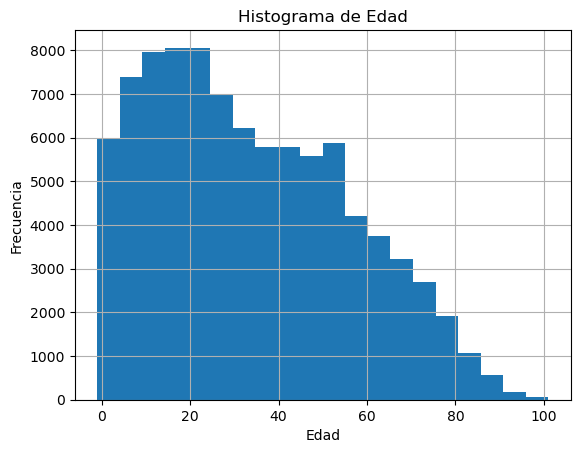

In [13]:
import matplotlib.pyplot as plt
df["edad2"].hist(bins=20)
plt.title("Histograma de Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

In [20]:
# Filtrar por ocupados y desocupados
df_ocupados = df[df["estado"] == 1]  # Ocupados
df_desocupados = df[df["estado"] == 2]  # Desocupados

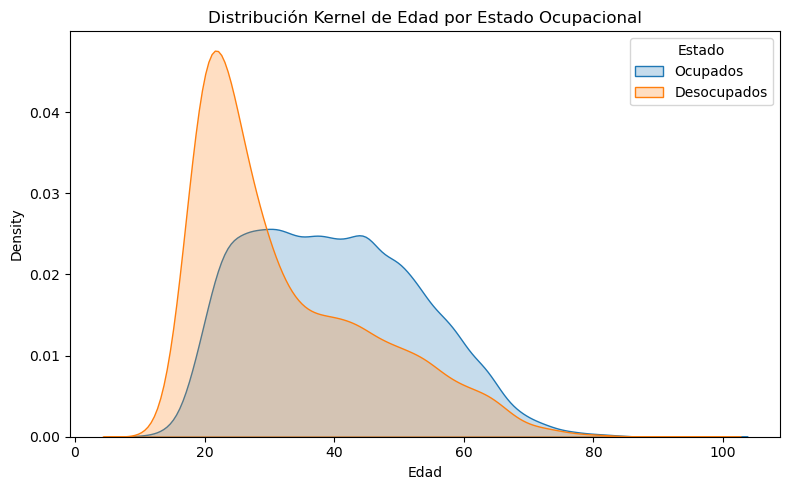

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 5))

# Graficar la distribución de densidad (Kernel)
sns.kdeplot(df_ocupados["edad2"], label="Ocupados", fill=True, ax=ax)
sns.kdeplot(df_desocupados["edad2"], label="Desocupados", fill=True, ax=ax)

# Agregar título y etiquetas
ax.set_title("Distribución Kernel de Edad por Estado Ocupacional")
ax.set_xlabel("Edad")
ax.legend(title="Estado")

plt.tight_layout()
plt.show()

PUNTO 2

In [34]:
# Función para calcular años de educación
def calcular_educ(row):
    if row["ch12"] == 2:  # Primario
        return row["ch14"]
    elif row["ch12"] == 4:  # Secundario
        return 12 if row["ch13"] == 1 else row["ch14"]
    elif row["ch12"] == 6:  # Terciario
        return 15 if row["ch13"] == 1 else 12 + row["ch14"]
    elif row["ch12"] == 7:  # Universitario
        return 17 if row["ch13"] == 1 else 12 + row["ch14"]
    elif row["ch12"] == 9:  # Educación especial
        return None  # No comparable
    else:
        return None  # Ns/Nr u otro valor

# Aplicar la función al DataFrame
df["educ"] = df.apply(calcular_educ, axis=1)

In [35]:
print(df["educ"].describe())

count    59379.000000
mean        10.113508
std         10.386366
min          0.000000
25%          3.000000
50%         12.000000
75%         14.000000
max        111.000000
Name: educ, dtype: float64


In [36]:
# Filtrar valores fuera del rango lógico (0 a 25 años)
df_limpio = df[(df["educ"] >= 0) & (df["educ"] <= 25)]

In [38]:
# Generar estadística descriptiva
estadisticas = df_limpio["educ"].describe(percentiles=[0.50])  # Incluye la mediana (p50)

# Mostrar los valores clave
print(f"Promedio: {estadisticas['mean']:.2f}")
print(f"Desviación estándar: {estadisticas['std']:.2f}")
print(f"Mínimo: {estadisticas['min']}")
print(f"Mediana (p50): {estadisticas.loc['50%']}")
print(f"Máximo: {estadisticas['max']}")

Promedio: 9.28
Desviación estándar: 5.63
Mínimo: 0.0
Mediana (p50): 12.0
Máximo: 21.0
